MOVIE DATA ANALYSIS

FINAL PROJECT SUBMISSION

* Student name:SUSAN WANJIRU MUCHIRI 
* Student pace: part time
* Scheduled project review date/time: 2nd-June-2024
* Instructor name: Samuel Karu
* Blog post URL:


OVERVIEW OF TN BUDGET MOVIES AND BOM GROSS MOVIES ANALYSIS

The analysis aims to compare the performance of low-budget movies from Tamil Nadu (TN) with high-grossing movies in the Box Office Mojo (BOM) database. This involves understanding the financial dynamics and audience reception of these two different segments of the movie industry.



 KEY COMPONENTS
1. TN Budget Movies:

   - Focuses on movies produced in Tamil Nadu with relatively low production costs.
   - Emphasis on profitability, cost-effective production techniques, and regional appeal.
   - Key metrics: production budget, box office revenue, profit margins, and critical reception.

2. BOM Gross Movies:

   - Encompasses movies listed in the Box Office Mojo database known for high gross revenues.
   - Includes blockbuster films from Hollywood and other major film industries.
   


Step 1: IMPORT NECESSARY LIBRARIES

Import all libraries required: numpy, pandas, matplotlib, and seaborn.

In [1269]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




Step 2: READ CSVS INTO DATAFRAMES

Load the data from csv files to the working notebook 

In [1270]:
df_tn = pd.read_csv('tn.movie_budgets.csv.gz')

df_tn.head()



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [1271]:
df_bm = pd.read_csv('bom.movie_gross.csv.gz')
df_bm.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [1272]:

print(df_tn.columns)
print(df_bm.columns)


Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [1273]:
df_tn.info()
df_bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memor

Step 3: DATA CLEANING

We need to convert several columns from str to int for analysis later on.

 - Get rid of money signs ($).
 - Get rid of commas (,).
 - Convert str to int.

 - Drop duplicates

 - Find the missing values in your data and get rid rid of them

 - Change the movie and title columns to lowercase 

 - Rename the columns

 - Drop certain columns that we won't need in our data analysis. 

In [1274]:
df_tn['domestic_gross'] = df_tn['domestic_gross' ].str.replace('$', '')
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",0,$0


In [1275]:
df_tn['production_budget'] = df_tn['production_budget' ].str.replace('$', '')
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"7,000",0,$0
5778,79,"Apr 2, 1999",Following,"6,000","48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"5,000","1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"1,400",0,$0


In [1276]:
df_tn['worldwide_gross'] = df_tn['worldwide_gross' ].str.replace('$', '')
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"7,000",0,0
5778,79,"Apr 2, 1999",Following,"6,000","48,482","240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"5,000","1,338","1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"1,400",0,0


In [1277]:
df_tn['production_budget'] = df_tn['production_budget'].str.replace(',', '')
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"760,507,625","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"241,063,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"42,762,350","149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"459,005,868","1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"620,181,382","1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,"48,482","240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"1,338","1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [1278]:
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace(',', '')
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,"240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,"1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [1279]:
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace(',', '')
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [1280]:
df_tn = df_tn.drop_duplicates(subset=None, keep='first')
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [1281]:
df_bm_1 = df_bm.drop_duplicates(subset=None, keep= 'first')
df_bm_1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [1282]:
null_values = df_tn.isnull().sum()
null_values

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [1283]:
df_bm_new = df_bm.isnull().sum()
df_bm_new = df_bm.dropna(inplace=True)
df_bm_new

In [1284]:
df_tn['release_date'] = pd.to_datetime(df_tn['release_date'])

# Sort the DataFrame by the date column in descending order
df_tn = df_tn.sort_values(by='release_date', ascending=False)

# Save the sorted DataFrame back to a CSV file
df_tn.to_csv('sorted_file.csv', index=False)

# Display the first few rows of the sorted DataFrame
df_tn.head()



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,2020-12-31,Moonfall,150000000,0,0
1205,6,2020-12-31,Hannibal the Conqueror,50000000,0,0
535,36,2020-02-21,Call of the Wild,82000000,0,0
480,81,2019-12-31,Army of the Dead,90000000,0,0
3515,16,2019-12-31,Eli,11000000,0,0


In [1285]:
# Assuming your date column is named 'date_column', convert it to datetime format
df_tn['release_date'] = pd.to_datetime(df_tn['release_date'], format='%d/%m/%Y')

# Extract only the year from the date column
df_tn['year'] = df_tn['release_date'].dt.year
df_tn['year']


194     2020
1205    2020
535     2020
480     2019
3515    2019
        ... 
5606    1925
5683    1920
5614    1916
5523    1916
5677    1915
Name: year, Length: 5782, dtype: int64

In [1286]:
df_tn


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
194,95,2020-12-31,Moonfall,150000000,0,0,2020
1205,6,2020-12-31,Hannibal the Conqueror,50000000,0,0,2020
535,36,2020-02-21,Call of the Wild,82000000,0,0,2020
480,81,2019-12-31,Army of the Dead,90000000,0,0,2019
3515,16,2019-12-31,Eli,11000000,0,0,2019
...,...,...,...,...,...,...,...
5606,7,1925-11-19,The Big Parade,245000,11000000,22000000,1925
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1916
5523,24,1916-09-05,Intolerance,385907,0,0,1916


In [1287]:
df_bm.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [1288]:
df_tn_new = df_tn.rename(columns = {"worldwide_gross": "foreign_gross"}, inplace=True)
df_tn_new




In [1289]:
# drop unused columns in all dataframes
df_tn_edit = df_tn.drop(['id','release_date'], axis =1)

df_bm_edit = df_bm.drop(['studio'], axis =1)



In [1290]:
df_tn_edit.head()

,movie,production_budget,domestic_gross,foreign_gross,year
194,Moonfall,150000000,0,0,2020
1205,Hannibal the Conqueror,50000000,0,0,2020
535,Call of the Wild,82000000,0,0,2020
480,Army of the Dead,90000000,0,0,2019
3515,Eli,11000000,0,0,2019


In [1291]:
df_bm_edit.head()

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010


In [1292]:
df_tn['movie'] = df_tn_edit['movie'].str.lower()
df_bm['title'] = df_bm_edit['title'].str.lower()

In [1293]:
df_tn_edit

,movie,production_budget,domestic_gross,foreign_gross,year
194,Moonfall,150000000,0,0,2020
1205,Hannibal the Conqueror,50000000,0,0,2020
535,Call of the Wild,82000000,0,0,2020
480,Army of the Dead,90000000,0,0,2019
3515,Eli,11000000,0,0,2019
...,...,...,...,...,...
5606,The Big Parade,245000,11000000,22000000,1925
5683,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
5614,"20,000 Leagues Under the Sea",200000,8000000,8000000,1916
5523,Intolerance,385907,0,0,1916


In [1294]:
df_bm_edit

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010
...,...,...,...,...
3275,I Still See You,1400.0,1500000,2018
3286,The Catcher Was a Spy,725000.0,229000,2018
3309,Time Freak,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,93200.0,5200,2018


 Step 3: MERGE THE DATA

 - Merge the two data sets to form one data set which we will use in data visualisation.
 - Find any missing values in the merged data
 - Save your data in a csv file
 - Group your data
 


In [1295]:
merged_data = pd.merge(df_tn_edit, df_bm_edit, how='inner', left_on='movie', right_on='title')
merged_data.head()

,movie,production_budget,domestic_gross_x,foreign_gross_x,year_x,title,domestic_gross_y,foreign_gross_y,year_y
0,Destroyer,9000000,1533324,3681096,2018,Destroyer,1500000.0,4000000,2018
1,Vice,60000000,47836282,70883171,2018,Vice,47800000.0,28200000,2018
2,On the Basis of Sex,20000000,24622687,38073377,2018,On the Basis of Sex,24600000.0,13600000,2018
3,Aquaman,160000000,335061807,1146894640,2018,Aquaman,335100000.0,812700000,2018
4,Second Act,15700000,39282227,63288854,2018,Second Act,39300000.0,33000000,2018


In [1296]:
print(merged_data.isnull().sum())

movie                0
production_budget    0
domestic_gross_x     0
foreign_gross_x      0
year_x               0
title                0
domestic_gross_y     0
foreign_gross_y      0
year_y               0
dtype: int64


In [1297]:
merged_data.to_csv("merged_movie_data.csv", index=False)

In [1298]:
grouped_data = merged_data.groupby('movie').agg({'production_budget': 'sum', 'domestic_gross_x': 'sum', 'foreign_gross_x': 'sum'})
grouped_data

,production_budget,domestic_gross_x,foreign_gross_x
movie,,,
10 Cloverfield Lane,5000000,72082999,108286422
12 Strong,35000000,45819713,71118378
12 Years a Slave,20000000,56671993,181025343
127 Hours,18000000,18335230,60217171
13 Hours: The Secret Soldiers of Benghazi,50000000,52853219,69411370
...,...,...,...
Zookeeper,80000000,80360866,170805525
Zoolander 2,50000000,28848693,55348693
Zootopia,150000000,341268248,1019429616


In [1299]:
grouped_data = merged_data.groupby('movie').agg({'production_budget': 'sum', 'domestic_gross_y': 'sum', 'foreign_gross_y': 'sum'})
grouped_data

,production_budget,domestic_gross_y,foreign_gross_y
movie,,,
10 Cloverfield Lane,5000000,72100000.0,38100000
12 Strong,35000000,45800000.0,21600000
12 Years a Slave,20000000,56700000.0,131100000
127 Hours,18000000,18300000.0,42400000
13 Hours: The Secret Soldiers of Benghazi,50000000,52900000.0,16600000
...,...,...,...
Zookeeper,80000000,80400000.0,89500000
Zoolander 2,50000000,28800000.0,27900000
Zootopia,150000000,341300000.0,682500000


Step 4:Data Visualisation


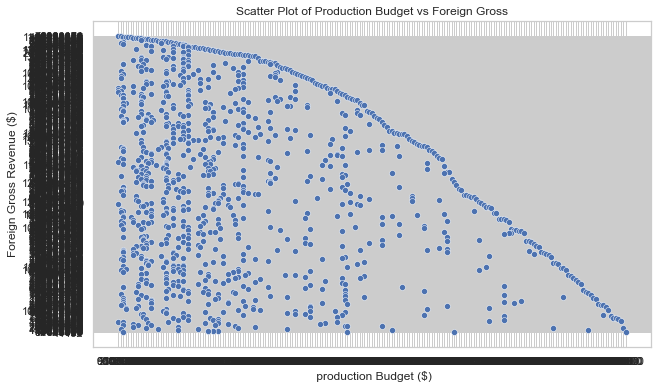

In [1300]:

sns.set(style="whitegrid")

# Scatter Plot: Budget vs Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='production_budget', y='foreign_gross_x')
plt.title('Scatter Plot of Production Budget vs Foreign Gross')
plt.xlabel(' production Budget ($)')
plt.ylabel('Foreign Gross Revenue ($)')
plt.show()

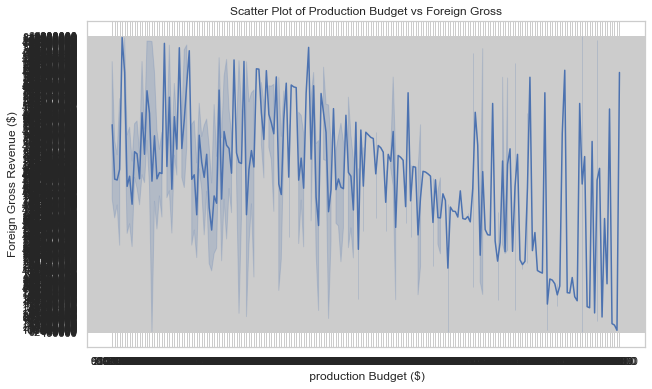

In [1315]:
sns.set(style="whitegrid")

# Scatter Plot: Budget vs Gross
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='production_budget', y='foreign_gross_y')
plt.title('Scatter Plot of Production Budget vs Foreign Gross')
plt.xlabel(' production Budget ($)')
plt.ylabel('Foreign Gross Revenue ($)')
plt.show()

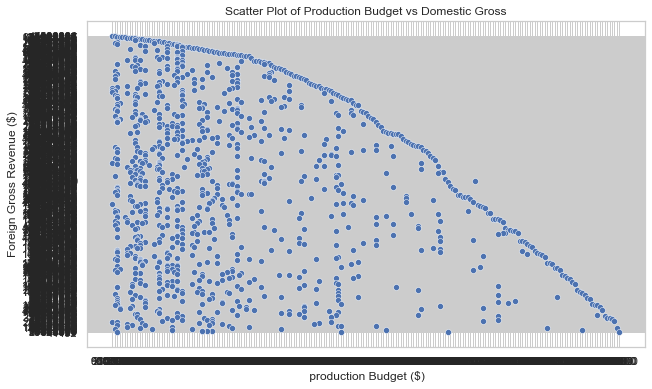

In [1302]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='production_budget', y='domestic_gross_x')
plt.title('Scatter Plot of Production Budget vs Domestic Gross')
plt.xlabel(' production Budget ($)')
plt.ylabel('Foreign Gross Revenue ($)')
plt.show()

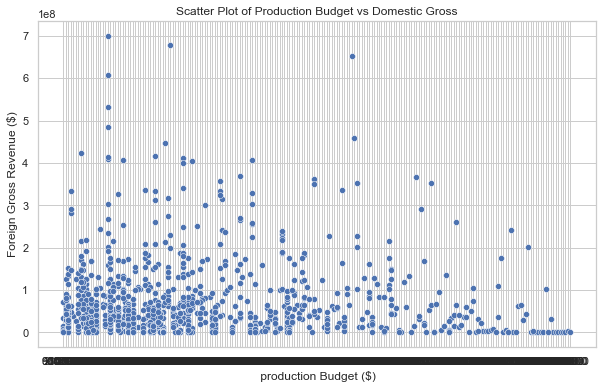

In [1303]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='production_budget', y='domestic_gross_y')
plt.title('Scatter Plot of Production Budget vs Domestic Gross')
plt.xlabel(' production Budget ($)')
plt.ylabel('Foreign Gross Revenue ($)')
plt.show()

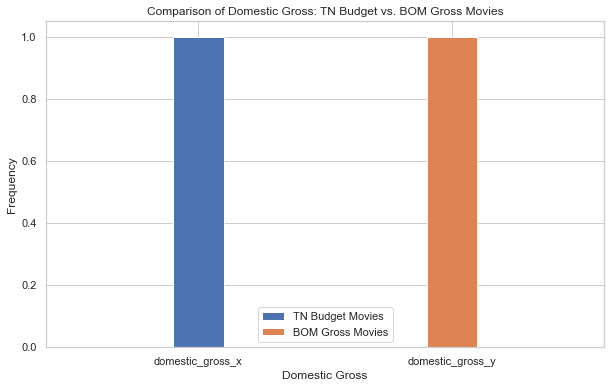

In [1304]:
tn_domestic_gross = [...]  # List of domestic gross for TN budget movies
bom_domestic_gross = [...]  # List of domestic gross for BOM gross movies

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.hist('domestic_gross_x', bins=5, alpha=1, label='TN Budget Movies')
plt.hist('domestic_gross_y', bins=5, alpha=1, label='BOM Gross Movies')
plt.xlabel('Domestic Gross')
plt.ylabel('Frequency')
plt.title('Comparison of Domestic Gross: TN Budget vs. BOM Gross Movies')
plt.legend()
plt.show()

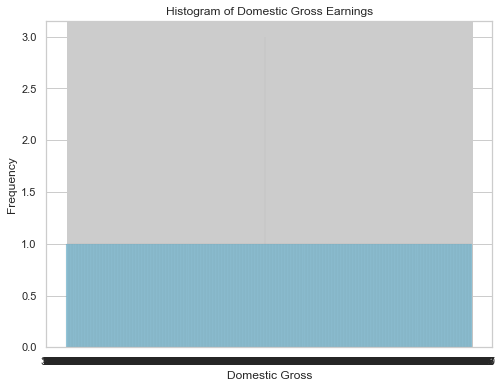

In [1307]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['domestic_gross_x'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Domestic Gross Earnings')
plt.xlabel('Domestic Gross')
plt.ylabel('Frequency')
plt.show()


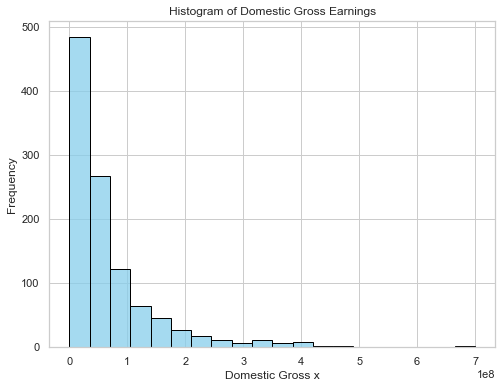

In [1310]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['domestic_gross_y'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Domestic Gross Earnings')
plt.xlabel('Domestic Gross x')
plt.ylabel('Frequency')
plt.show()


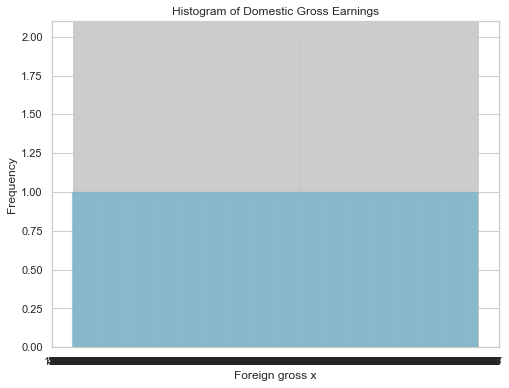

In [1311]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['foreign_gross_x'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Domestic Gross Earnings')
plt.xlabel('Foreign gross x')
plt.ylabel('Frequency')
plt.show()


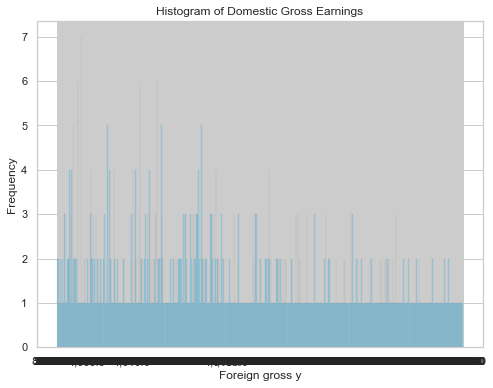

In [1313]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['foreign_gross_y'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Domestic Gross Earnings')
plt.xlabel('Foreign gross y')
plt.ylabel('Frequency')
plt.show()


Step 5: CONCLUSION


The analysis underscores the distinct dynamics of low-budget regional cinema in Tamil Nadu and high-grossing international cinema. Both segments demonstrate unique strategies for achieving financial success and audience engagement, highlighting the diverse nature of the film industry.

BOM movies leverage star power, advanced special effects, and established franchises.

TN budget movies often succeed by focusing on relatable stories, regional flavor, and strong word-of-mouth promotion.


RECOMMENDATION
